### Define Groundtruth Labels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
output_plots = 'plots/ground_truth_plots.pdf'
plot_dictionary = dict()

In [4]:
ground_truth = pd.read_csv('data/filtered_cbmc_adt_assay.csv')

In [5]:
ground_truth.index = ground_truth['Unnamed: 0']
ground_truth.drop(columns = 'Unnamed: 0',inplace = True)
ground_truth = ground_truth.transpose()
ground_truth.head()

Unnamed: 0,CD3,CD4,CD8,CD45RA,CD56,CD16,CD11c,CD14,CD19,CD34
CTGTTTACACCGCTAG,-0.735049,-0.843184,-0.060869,-0.881426,0.139739,1.011129,-0.285084,-0.397836,0.191633,2.378932
CTCTACGGTGTGGCTC,-0.780484,-0.965256,-0.198995,0.456681,0.208088,0.443042,-0.385237,-0.833485,3.403329,0.785726
AGCAGCCAGGCTCATT,-0.583873,-0.653746,-0.181778,-0.813562,0.503768,0.560597,-0.385237,-0.596925,0.321402,0.763879
GAATAAGAGATCCCAT,-0.763236,-0.873997,-0.225356,-1.015237,0.032542,0.116402,-0.582256,-0.790293,-0.153276,0.871379
GTGCATAGTCATGCAT,-0.718461,-0.803147,0.068072,-0.837305,0.735209,1.074611,-0.170130,-0.625199,0.349014,2.033236


In [6]:
ground_truth

Unnamed: 0,CD3,CD4,CD8,CD45RA,CD56,CD16,CD11c,CD14,CD19,CD34
CTGTTTACACCGCTAG,-0.735049,-0.843184,-0.060869,-0.881426,0.139739,1.011129,-0.285084,-0.397836,0.191633,2.378932
CTCTACGGTGTGGCTC,-0.780484,-0.965256,-0.198995,0.456681,0.208088,0.443042,-0.385237,-0.833485,3.403329,0.785726
AGCAGCCAGGCTCATT,-0.583873,-0.653746,-0.181778,-0.813562,0.503768,0.560597,-0.385237,-0.596925,0.321402,0.763879
GAATAAGAGATCCCAT,-0.763236,-0.873997,-0.225356,-1.015237,0.032542,0.116402,-0.582256,-0.790293,-0.153276,0.871379
GTGCATAGTCATGCAT,-0.718461,-0.803147,0.068072,-0.837305,0.735209,1.074611,-0.170130,-0.625199,0.349014,2.033236
...,...,...,...,...,...,...,...,...,...,...
TTGCCGTGTAGATTAG,-1.083358,-1.004671,-0.772083,-1.255012,-0.946676,-1.309227,0.714515,-0.864841,-1.203855,-1.842752
GGCGTGTAGTGTACTC,-1.024656,-1.016144,-0.645753,-1.187087,-1.008064,-0.812735,0.116903,-0.449969,-1.048724,-1.365943
CGTATGCCGTCTTCTG,-1.075856,-1.214083,-0.849375,-1.281211,-1.384962,-1.484583,-1.072368,-1.709686,-1.303767,-1.901368
TACACGACGCTCTTCC,-0.996387,-1.161859,-0.606783,-1.203977,-1.136911,-0.903020,-1.013856,-1.655644,-0.990224,-1.567475


In [7]:
adt = sc.AnnData(X = ground_truth)

In [8]:
adt.X

array([[-0.73504907, -0.8431841 , -0.0608686 , ..., -0.39783597,
         0.19163336,  2.3789322 ],
       [-0.7804836 , -0.9652564 , -0.19899476, ..., -0.8334854 ,
         3.4033287 ,  0.7857263 ],
       [-0.58387285, -0.6537459 , -0.18177819, ..., -0.5969248 ,
         0.32140166,  0.76387864],
       ...,
       [-1.0758556 , -1.2140831 , -0.8493755 , ..., -1.7096856 ,
        -1.3037674 , -1.901368  ],
       [-0.99638665, -1.1618587 , -0.6067826 , ..., -1.655644  ,
        -0.99022377, -1.5674745 ],
       [-1.0536349 , -1.1747297 , -0.72827715, ..., -1.6915305 ,
        -0.99022377, -1.5156542 ]], dtype=float32)

### Perform Clustering to Create Ground Truth Labels

In [9]:
sc.pp.neighbors(adt, n_neighbors = 15)

In [10]:
#keep resolution small to limit number of clusters
sc.tl.leiden(adt, random_state = 0, resolution = .4)

In [11]:
adt.obs['leiden']

CTGTTTACACCGCTAG    4
CTCTACGGTGTGGCTC    6
AGCAGCCAGGCTCATT    4
GAATAAGAGATCCCAT    4
GTGCATAGTCATGCAT    4
                   ..
TTGCCGTGTAGATTAG    0
GGCGTGTAGTGTACTC    0
CGTATGCCGTCTTCTG    4
TACACGACGCTCTTCC    4
ACACGACGCTCTTCCG    4
Name: leiden, Length: 8617, dtype: category
Categories (14, object): [0, 1, 2, 3, ..., 10, 11, 12, 13]

In [12]:
ground_truth['leiden'] = adt.obs['leiden'].values
ground_truth['leiden'] = ground_truth['leiden'].astype(int)

In [19]:
ground_truth['count'] = 1
ground_truth.groupby('leiden')['count'].sum().reset_index()

,leiden,count
0,0,2313
1,1,1469
2,2,1078
3,3,944
4,4,693
5,5,560
6,6,346
7,7,313
8,8,297
9,9,202


In [36]:
ground_truth.shape

(8617, 13)

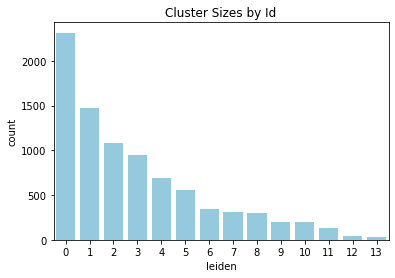

In [31]:
sns.barplot(x="leiden", y="count", data=ground_truth.groupby('leiden')['count'].sum().reset_index(), 
            color = 'skyblue')
plt.title('Cluster Sizes by Id')
plot_dictionary['ClusterSizes'] = plt.gca().get_figure()

### Check with Seurat
Check that numbers ball park approximate what is listed in Seurat.
* Cluster 0 looks like CD14+ Monocyte (CD11c, CD14)- 2300
* Cluster 1,2,5 looks like Memory/Naive CD4 T Cells (CD3, CD4) 2950- amount is a little low. 
* Clusters 3,7 look like NK (CD45RA, CD56, CD16) - 1250 
* Cluster 4,11 looks like Mouse/CD34+ (CD34).  11 is more likely CD34+ due to its size.
* Cluster 6 looks like B (CD19)- 346
* Cluster 8 looks like CD8 (CD8)- 297
* Cluster 9 (CD16, CD11C) looks like CD16
* Cluster 10 looks like doublets (CD3, CD4, CD11c, CD14)- 197
* Cluster 12,13? (small)

In [15]:
cluster_mapping = {0:'CD14+ Monocyte', 1: 'CD4 T Cells', 2: 'CD4 T Cells',
                  3: 'NK', 4: 'Mouse/CD34+', 5: 'CD4 T Cells', 6: 'B',
                  7: 'NK', 8: 'CD8', 9: 'CD16', 10: 'Doublets', 11: 'Mouse/CD34+',
                  12: 'Other', 13: 'Other'}

In [16]:
ground_truth['truth_names'] = ground_truth['leiden'].replace(cluster_mapping)

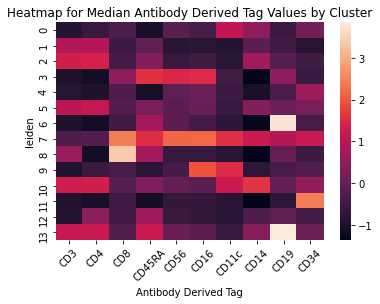

In [33]:
sns.heatmap(ground_truth.groupby('leiden').median().drop(columns = 'count'))
plt.title('Heatmap for Median Antibody Derived Tag Values by Cluster')
plt.xlabel('Antibody Derived Tag')
plt.xticks(rotation = 45)
plot_dictionary['ADTExpression'] = plt.gca().get_figure()

In [34]:
plot_dictionary.keys()

dict_keys(['ClusterSizes', 'ADTExpression'])

In [27]:
ground_truth.groupby('leiden').median()

Unnamed: 0,CD3,CD4,CD8,CD45RA,CD56,CD16,CD11c,CD14,CD19,CD34,count
leiden,,,,,,,,,,,
0,-0.833827,-0.597410,-0.328047,-1.022366,-0.120137,-0.393899,1.110489,0.510354,-0.557297,0.177770,1
1,0.936854,0.959811,-0.532897,-0.040352,-0.801103,-0.726198,-0.865671,-0.121313,-0.468931,-0.799283,1
2,1.343383,1.384478,-0.420167,0.334774,-0.588523,-0.467456,-0.779694,0.733679,-0.189842,-0.467102,1
3,-0.948519,-1.093148,0.515257,1.600336,1.466696,1.544446,-0.429433,-1.316859,0.531303,-0.573322,1
4,-0.821758,-0.937780,-0.299039,-1.012395,-0.080841,0.073530,-0.513109,-1.001406,-0.304209,0.674664,1
5,1.081498,1.177769,-0.234291,0.262227,-0.110264,0.044450,-0.582256,0.372548,0.067886,0.231812,1
6,-0.948519,-1.093148,-0.475033,0.743276,-0.100391,-0.412047,-0.727377,-1.256194,3.738295,-0.364929,1
7,-0.284232,-0.224238,2.434880,1.549377,2.160550,2.184065,1.572278,1.232126,0.939634,1.207661,1
8,0.622306,-1.099254,3.377188,0.770026,-0.588523,-0.563210,-0.803667,-1.324555,0.019202,-0.537446,1


In [35]:
with PdfPages('ground_truth_dist.pdf') as pdf:
    for col in ground_truth.columns:
        sns.boxplot(x = 'leiden', y = col, data = ground_truth)
        plt.title('ADT Cluster Distribution ' + col)
        plt.tight_layout()
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()
    for key in plot_dictionary.keys():
        pdf.savefig(plot_dictionary[key])

### Export Ground Truth

In [45]:
ground_truth.to_csv('ground_truth.csv')